In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint
import optuna
from scipy.stats import kstest, normaltest, chi2, poisson, lognorm
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
train = pd.read_csv(r'D:\공부\포트폴리오\Kaggle\Classification with an Academic Success\train.csv')
test = pd.read_csv(r'D:\공부\포트폴리오\Kaggle\Classification with an Academic Success\test.csv')
sample_submission = pd.read_csv(r'D:\공부\포트폴리오\Kaggle\Classification with an Academic Success\sample_submission.csv')

In [5]:
def read_data(file_path):
    df = pd.read_csv(file_path)
    print(f"The shape of the dataframe is: {df.shape}")
    display(df.head(3))
    return df

# 파일 경로에 따라 데이터 불러오기
df_train = read_data(r'D:\공부\캐글(Kaggle)\Classification with an Academic Success Dataset\train.csv')
df_test = read_data(r'D:\공부\캐글(Kaggle)\Classification with an Academic Success Dataset\test.csv')
df_sample_submission = read_data(r'D:\공부\캐글(Kaggle)\Classification with an Academic Success Dataset\sample_submission.csv')


The shape of the dataframe is: (76518, 38)


,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout


The shape of the dataframe is: (51012, 37)


,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.0,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.5,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.0,0,15.5,2.8,-4.06


The shape of the dataframe is: (51012, 2)


,id,Target
0,76518,Graduate
1,76519,Graduate
2,76520,Graduate


In [ ]:
def display_object_columns(df):
    object_columns = df.select_dtypes(include=['object']).columns
    print("Object Type Columns:")
    for col in object_columns:
        print(f"Name of Columns: {col}")
        print(df[col].head())
        print()

display_object_columns(df_train)
display_object_columns(df_test)

Object Type Columns:
Name of Columns: Target
0    Graduate
1     Dropout
2     Dropout
3    Enrolled
4    Graduate
Name: Target, dtype: object

Object Type Columns:


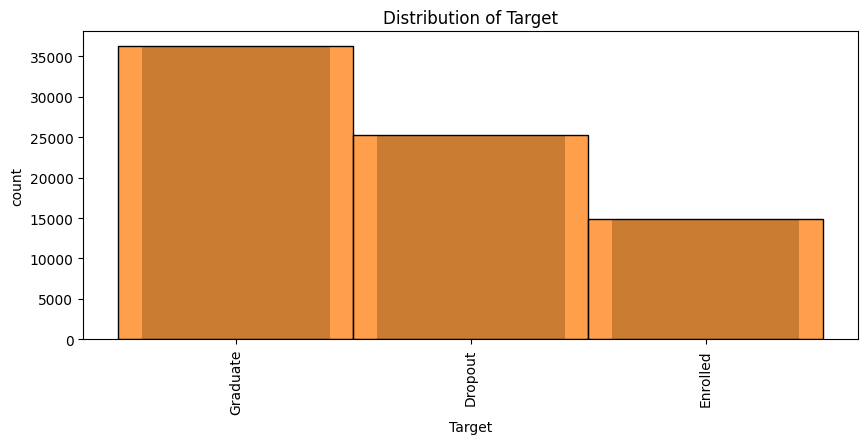

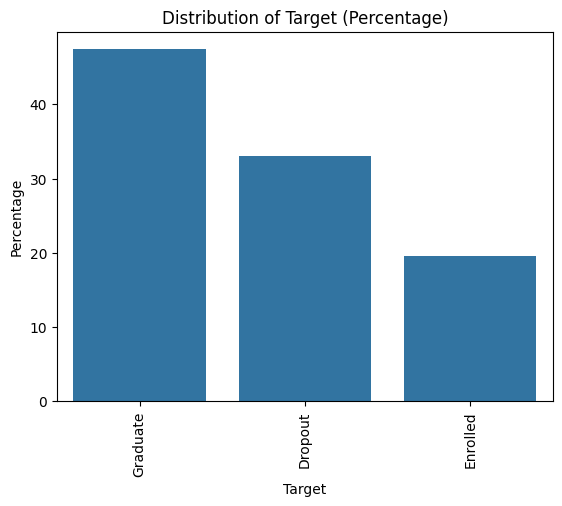


Distribution of Target (Percentage):
     Target  Percentage
0  Graduate   47.416294
1   Dropout   33.058888
2  Enrolled   19.524818


In [10]:
categorical_columns = df_train.select_dtypes(include=['object']).columns
categorical_columns

for columns in categorical_columns: 
    plt.figure(figsize= (10, 4))
    sns.countplot(x=columns, data = df_train)
    sns.histplot(x=columns, data = df_train)
    plt.title(f'Distribution of {columns}')
    plt.xticks(rotation=90)
    plt.show()
    
    # 빈도 계산
    counts = df_train[columns].value_counts(normalize=True) * 100  # 퍼센트로 변환
    counts = counts.reset_index()
    counts.columns = [columns, 'Percentage']
    
    # 그래프 그리기
    sns.barplot(x=columns, y='Percentage', data=counts)
    
    plt.title(f'Distribution of {columns} (Percentage)')
    plt.xticks(rotation=90)
    plt.show()
    
# 각 범주형 열의 분포를 퍼센트로 계산하여 출력
def calculate_percentage(df, columns):
    percentage_tables = {}
    for column in columns:
        counts = df[column].value_counts(normalize=True) * 100  # 퍼센트로 변환
        counts = counts.reset_index()
        counts.columns = [column, 'Percentage']
        percentage_tables[column] = counts
    return percentage_tables

# 각 범주형 열에 대한 퍼센트 테이블 계산
percentage_tables = calculate_percentage(df_train, categorical_columns)

# 각 범주형 열에 대한 퍼센트 테이블 출력
for column, table in percentage_tables.items():
    print(f"\nDistribution of {column} (Percentage):")
    print(table)

In [11]:
# 수치형 열과 범주형 열 구분
numeric_columns = df_train.select_dtypes(include=[np.number]).columns
categorical_columns = df_train.select_dtypes(include=['object']).columns

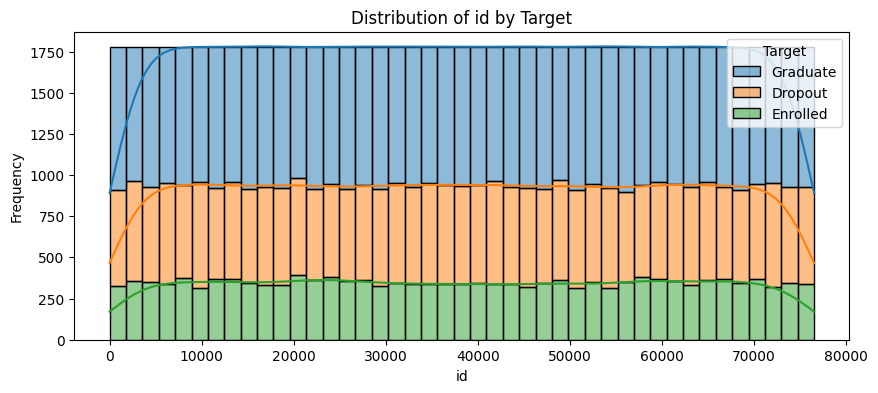

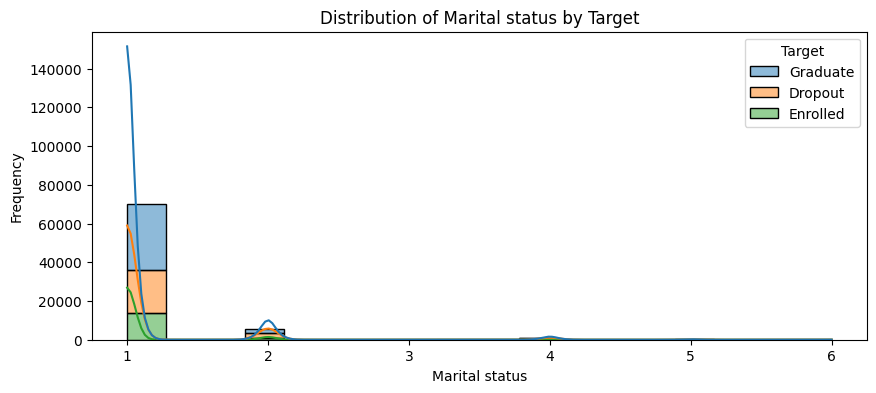

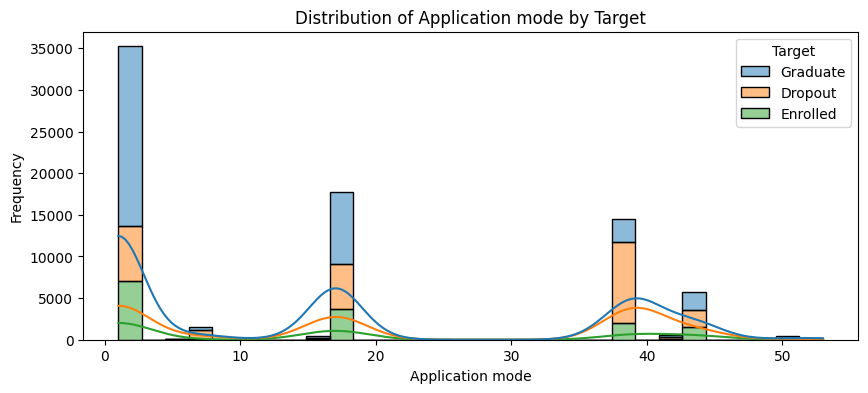

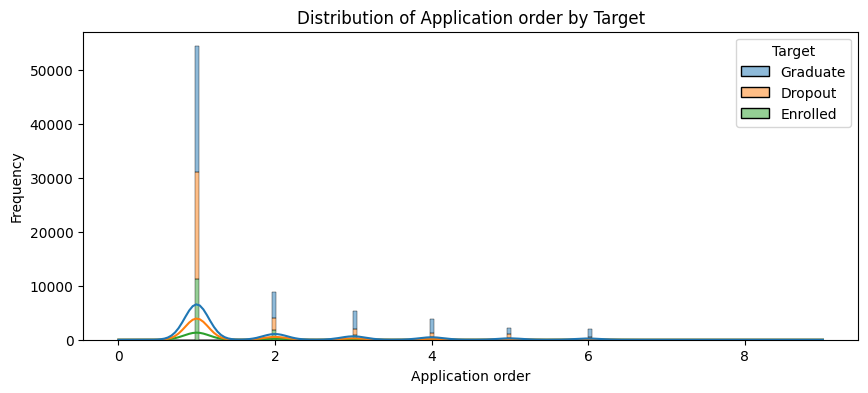

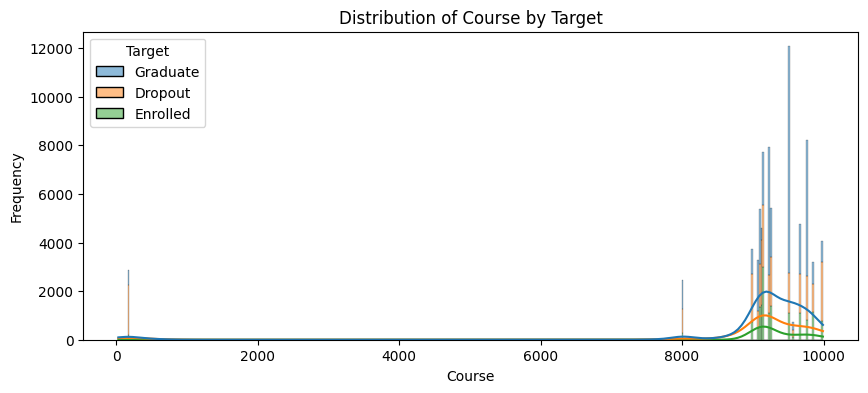

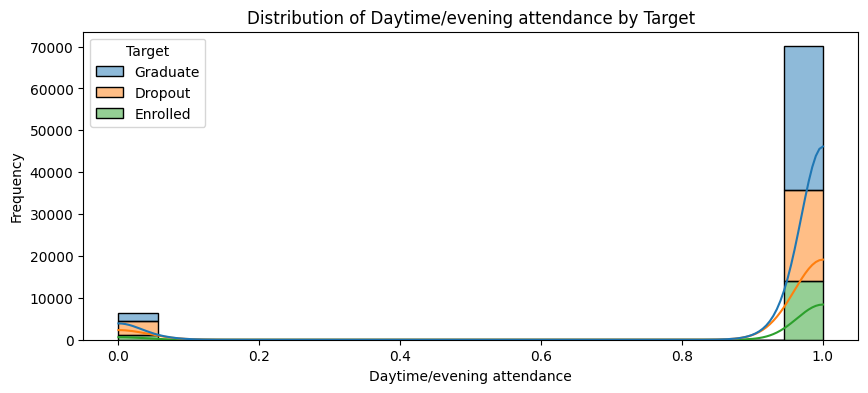

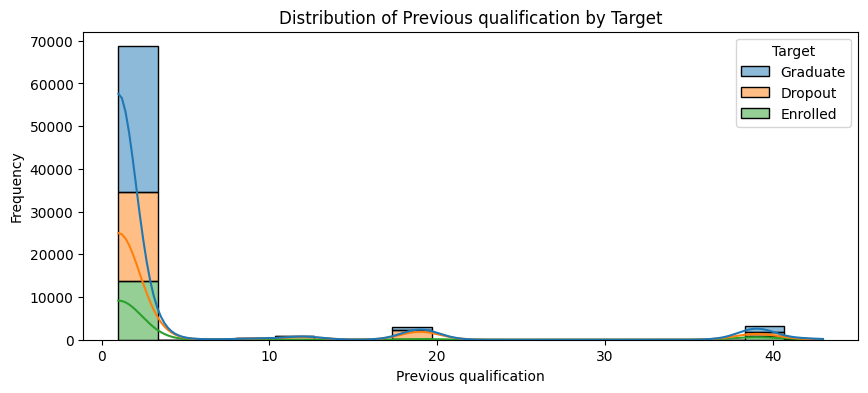

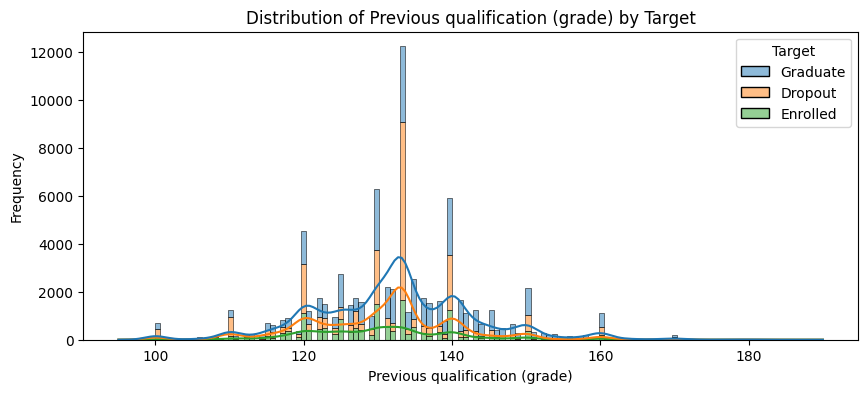

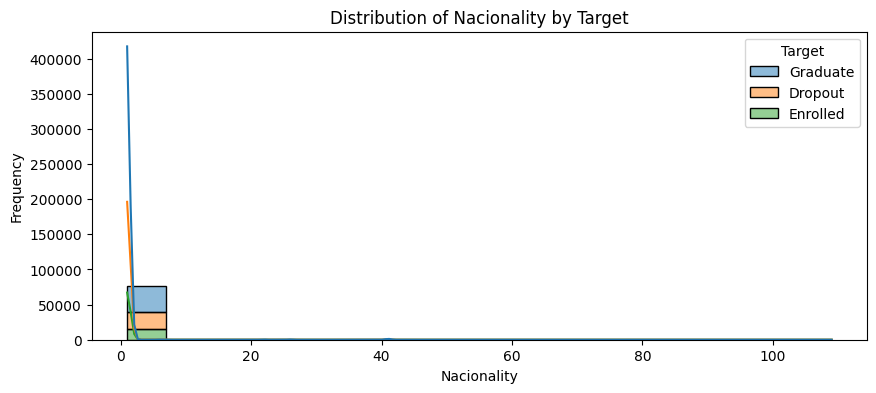

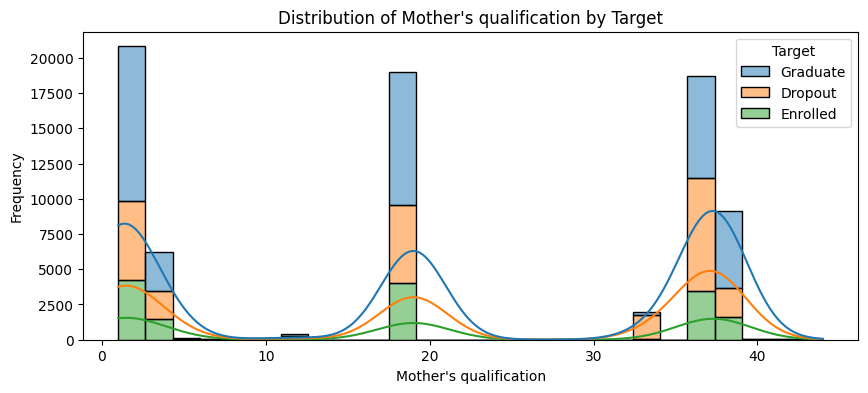

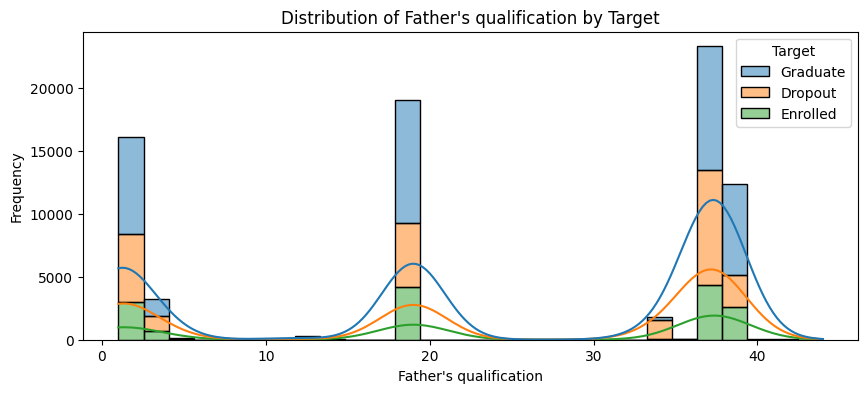

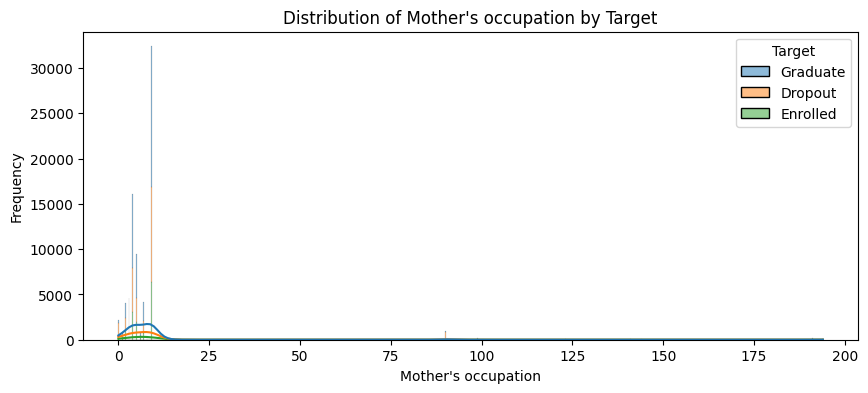

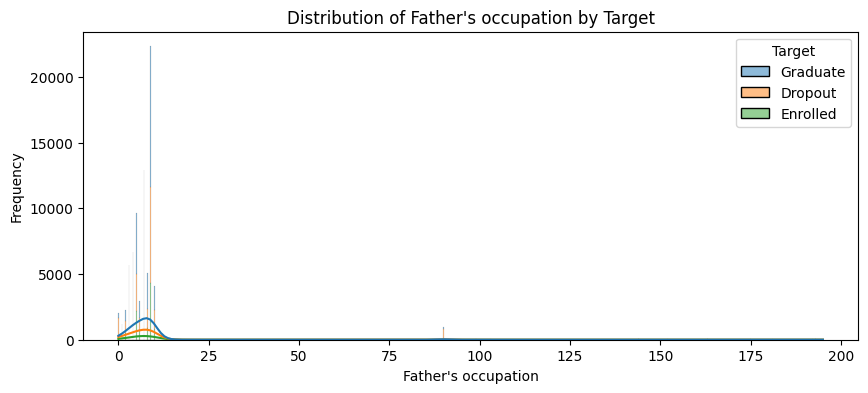

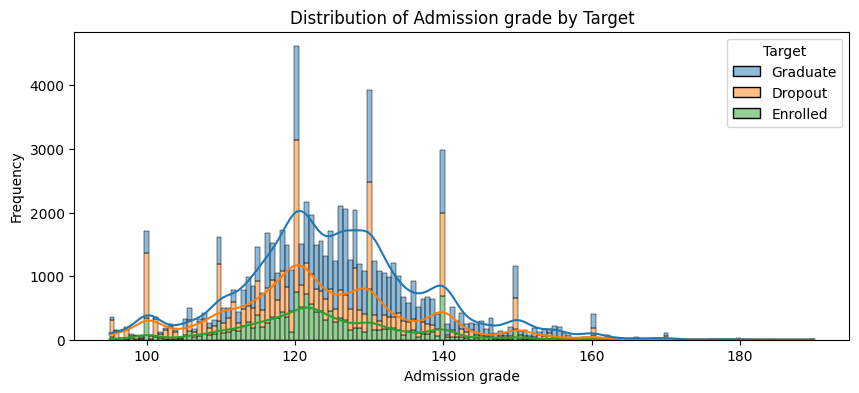

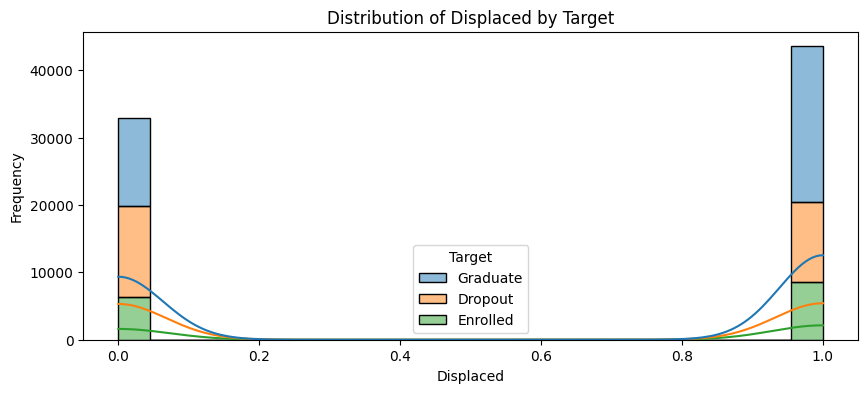

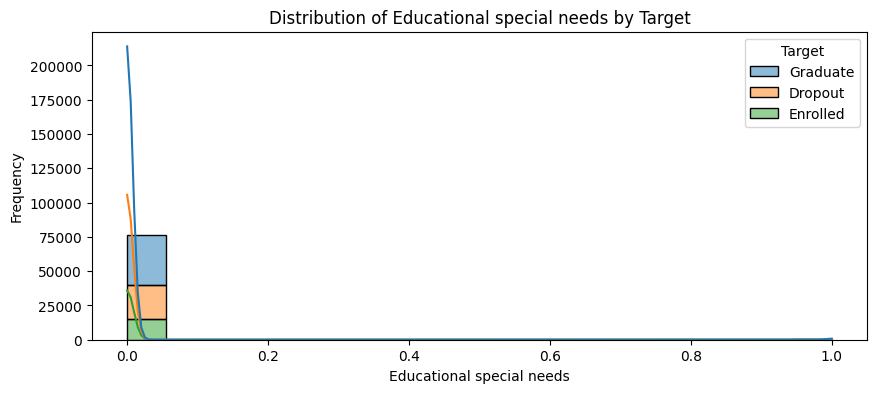

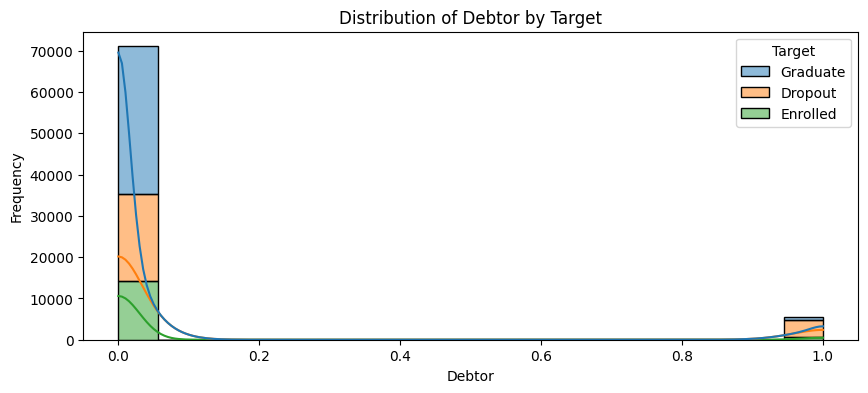

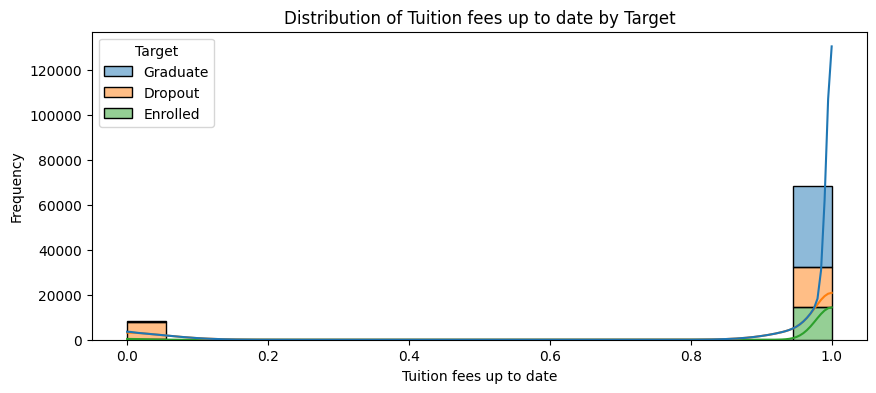

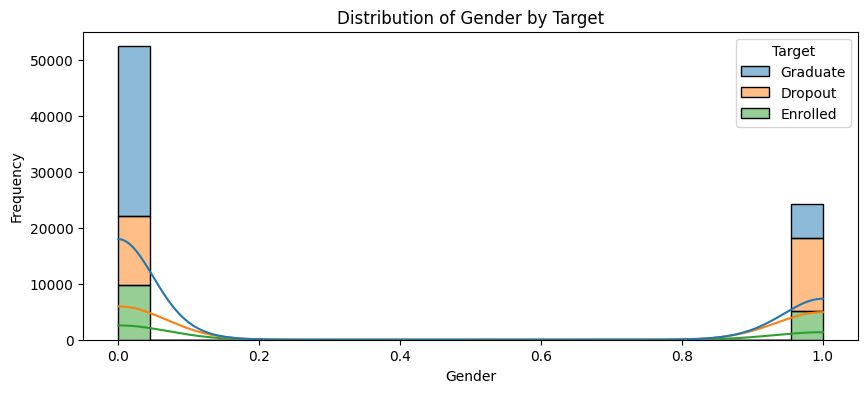

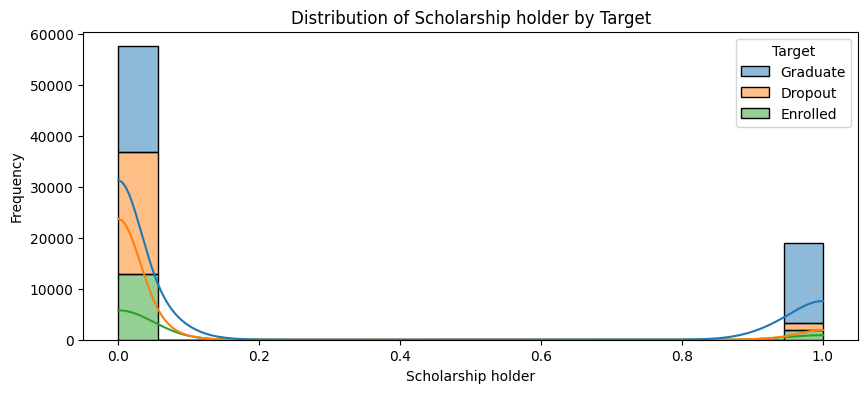

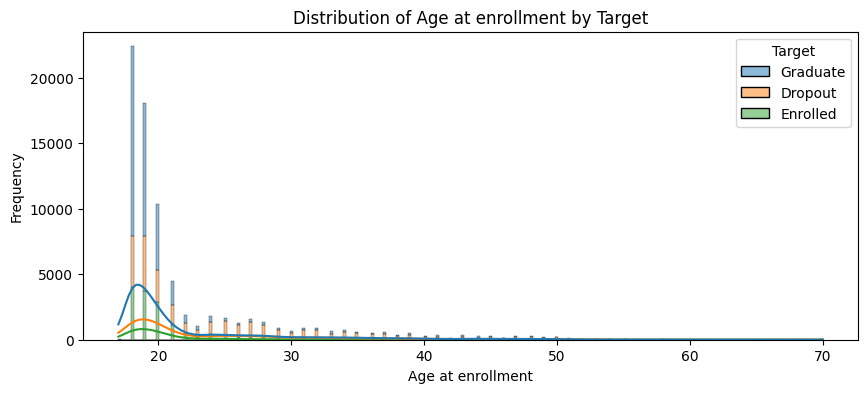

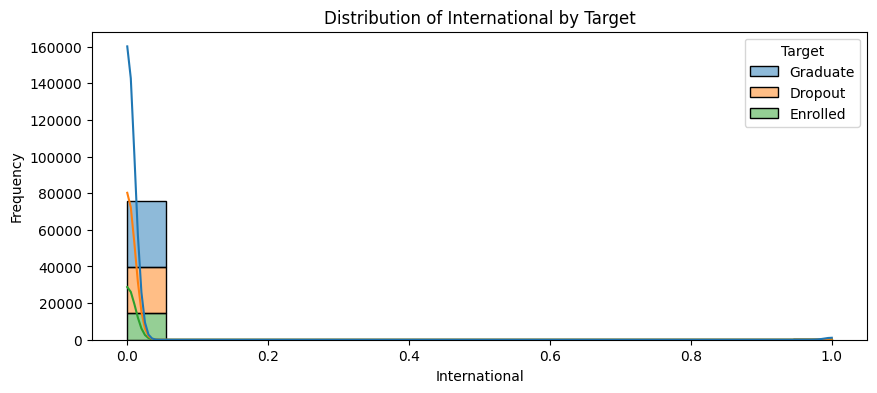

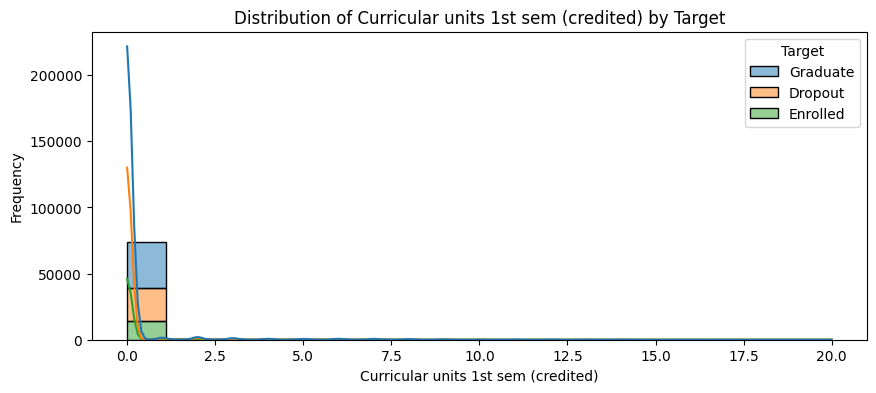

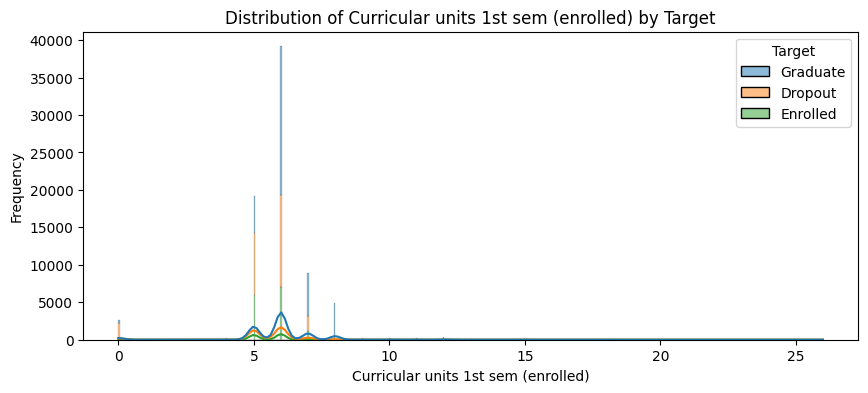

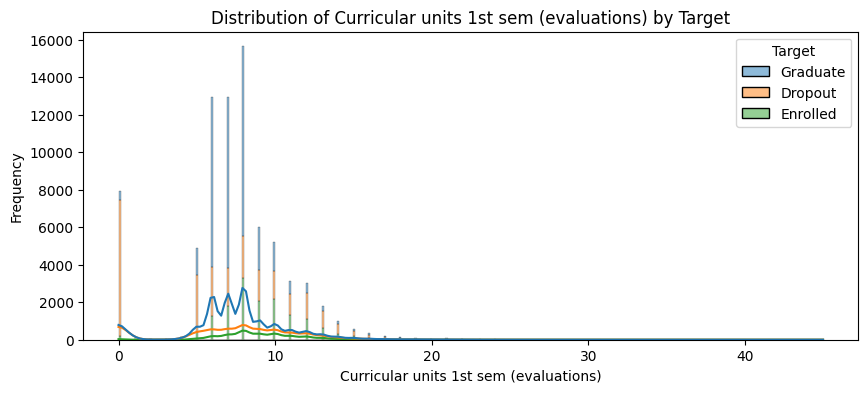

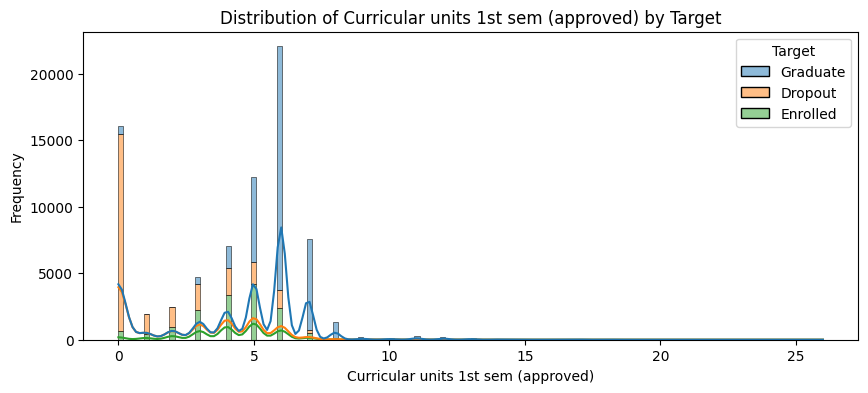

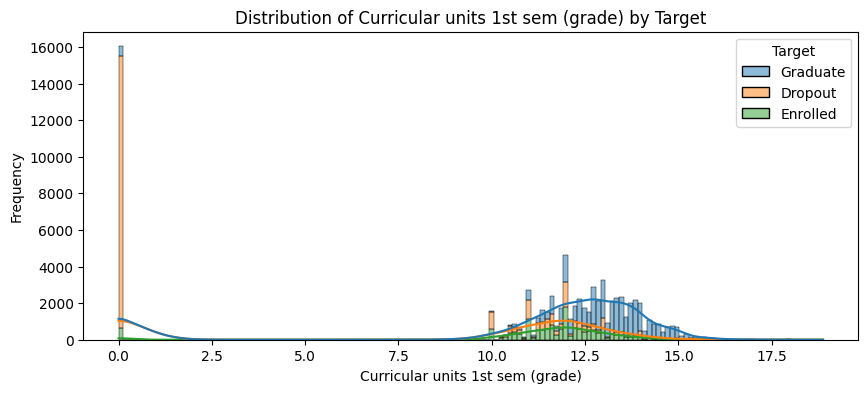

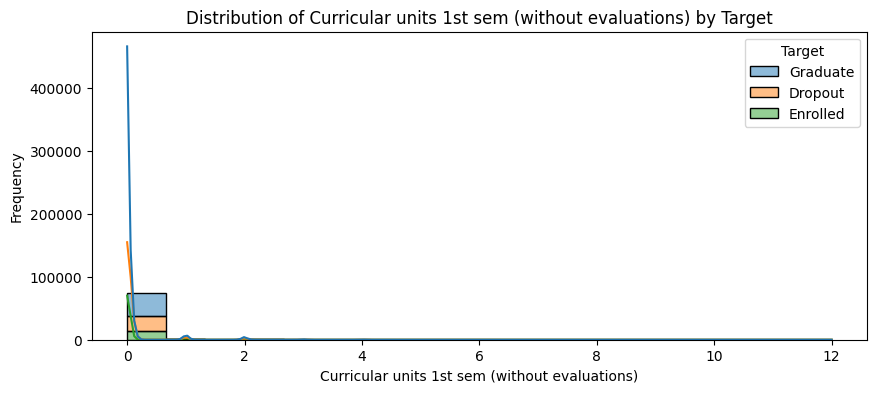

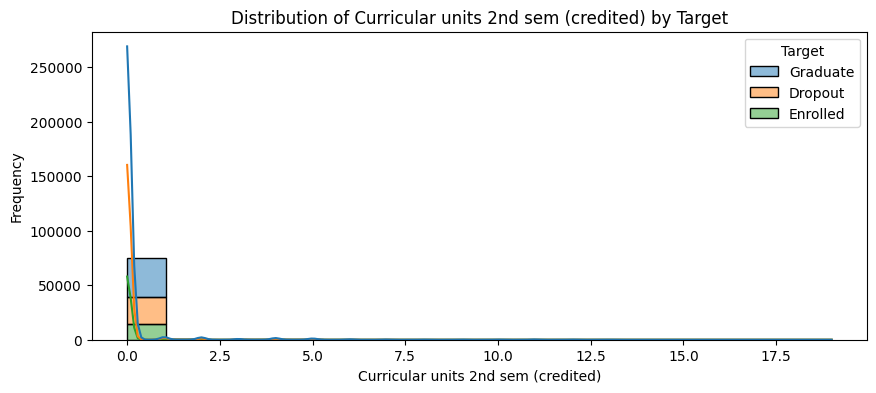

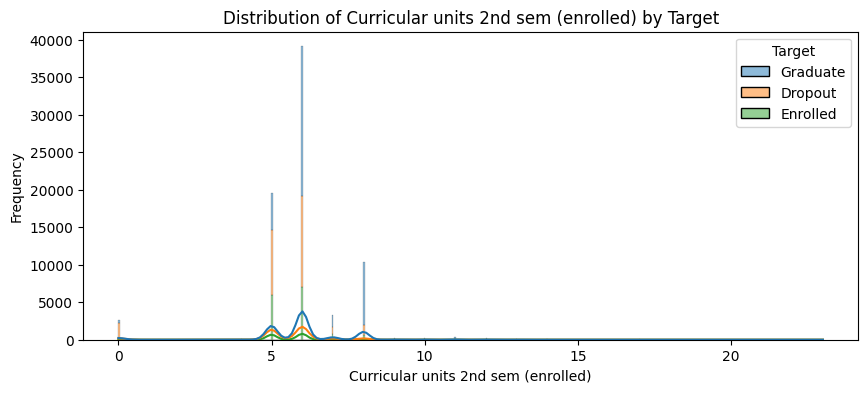

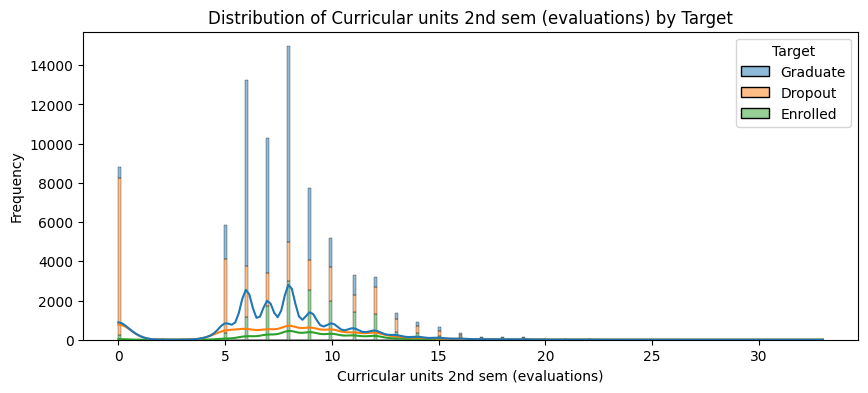

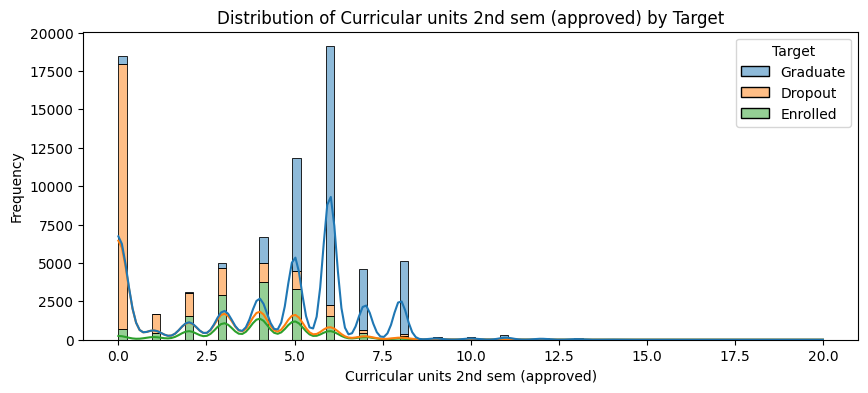

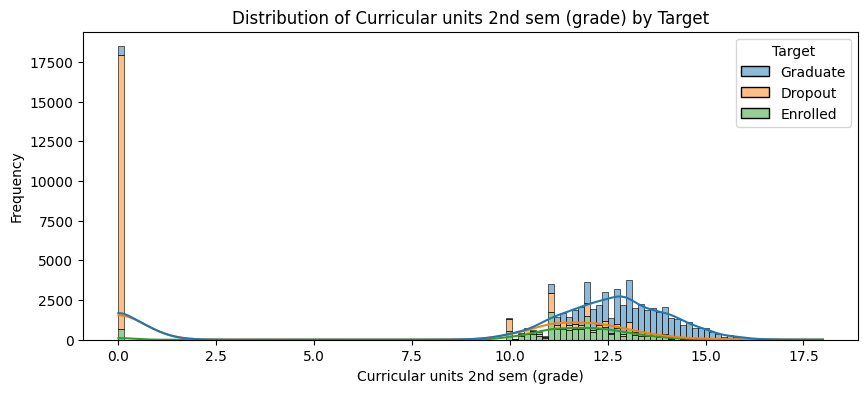

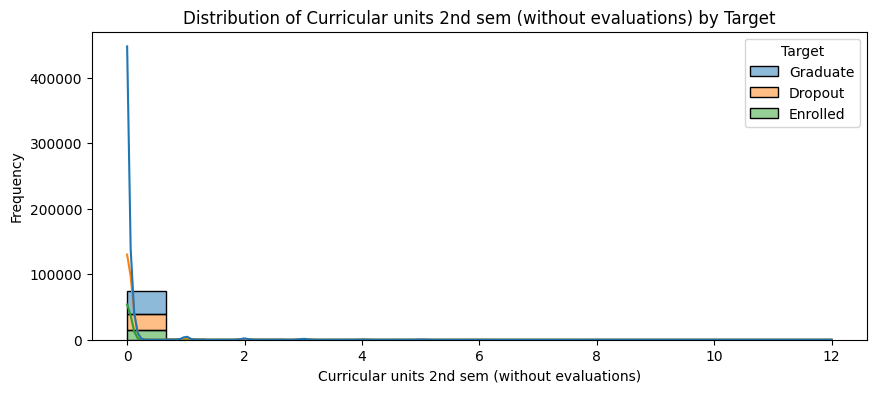

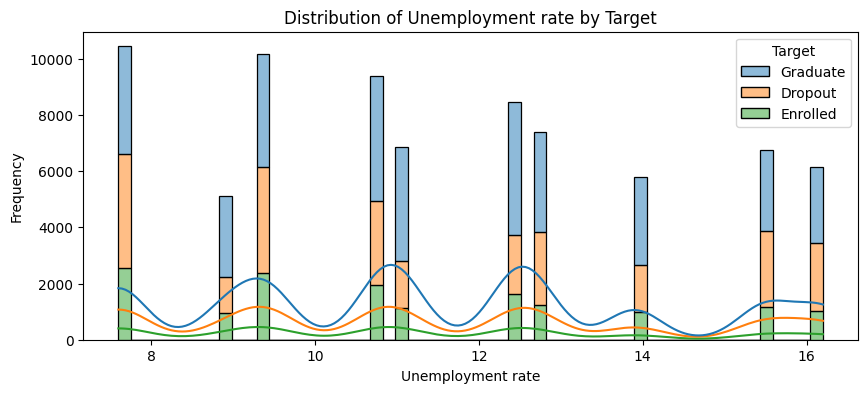

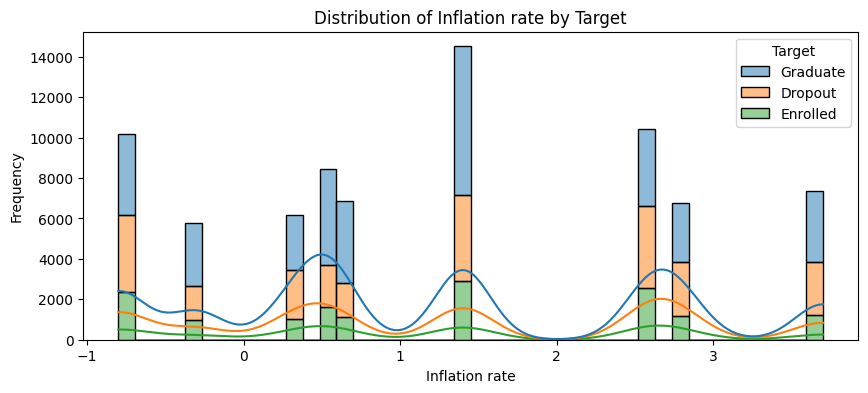

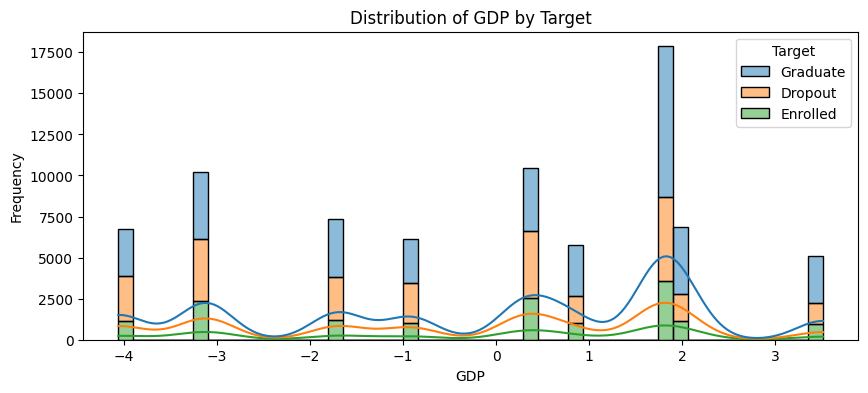

<Figure size 1000x400 with 0 Axes>

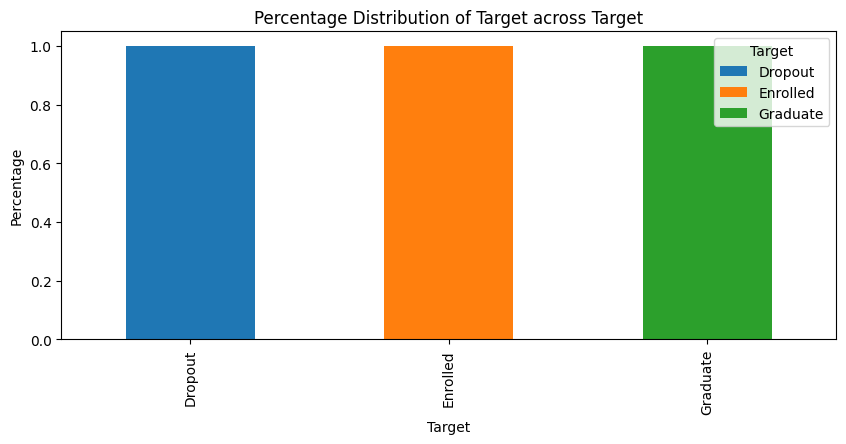

In [12]:
target = 'Target'
# 수치형 열의 분포 시각화 (목표 변수 기준)
for col in numeric_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df_train, x=col, hue=target, multiple="stack", kde=True)
    plt.title(f'Distribution of {col} by {target}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# 범주형 열의 분포 시각화 (목표 변수 기준)
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    contingency_table = pd.crosstab(df_train[col], df_train[target], normalize='index')
    contingency_table.plot(kind="bar", stacked=True, figsize=(10, 4))
    plt.title(f'Percentage Distribution of {target} across {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.legend(title=target)
    plt.xticks(rotation=90)